# Introduction  

**Project Overview**  

This analysis dives into the historical data of the online store "Streamchik".  
The overarching goal is to discern patterns that dictate a game's success, subsequently informing decisions about potential advertising campaigns.

**Project Structure**  

1. Data Exploration and Preprocessing - A comprehensive overview of the dataset, focusing on cleaning, transforming, and enriching the data, ensuring it's primed for subsequent analysis.

3. Exploratory Data Analysis (EDA) - Delving deep into the dataset to understand distributions, relationships, and key statistical attributes, and to pinpoint crucial metrics.

4. User Profile Analysis - Scrutinizing and contrasting user behaviors across different regions.

5. Hypothesis Testing - Employing statistical methods to test hypotheses about the equality of average user ratings across Xbox One and PC platforms, as well as discerning potential differences in user ratings between the Action and Sports genres.

6. Conclusion - Summarizing the analysis, articulating insights, and offering recommendations.

**Data Description**  

The dataset encompasses the following attributes:

- `name` — Game title;
- `platform` — Gaming platform;
- `year_of_release` — Year the game was launched;
- `genre` — Game genre;
- `na_sales` — Sales in North America (in millions);
- `eu_sales` — Sales in Europe (in millions);
- `jp_sales` — Sales in Japan (in millions);
- `other_sales` — Sales in other regions (in millions);
- `critic_score` — Critic score (max of 100);
- `user_score` — User score (max of 10);
- `rating` — Age rating from the Entertainment Software Rating Board (ESRB).

## Data Exploration and Preparation

In [83]:
# Importing necessary libraries for the analysis
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import seaborn as sns

In [84]:
# Loading the data and displaying the first 5 rows
games = pd.read_csv('/Users/vyacheslav/Downloads/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [85]:
# Reviewing the general information of the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [86]:
# Checking for outliers in release years
print('Earliest release year:', games['Year_of_Release'].min())
print('Latest release year:', games['Year_of_Release'].max())

Earliest release year: 1980.0
Latest release year: 2016.0


<Axes: >

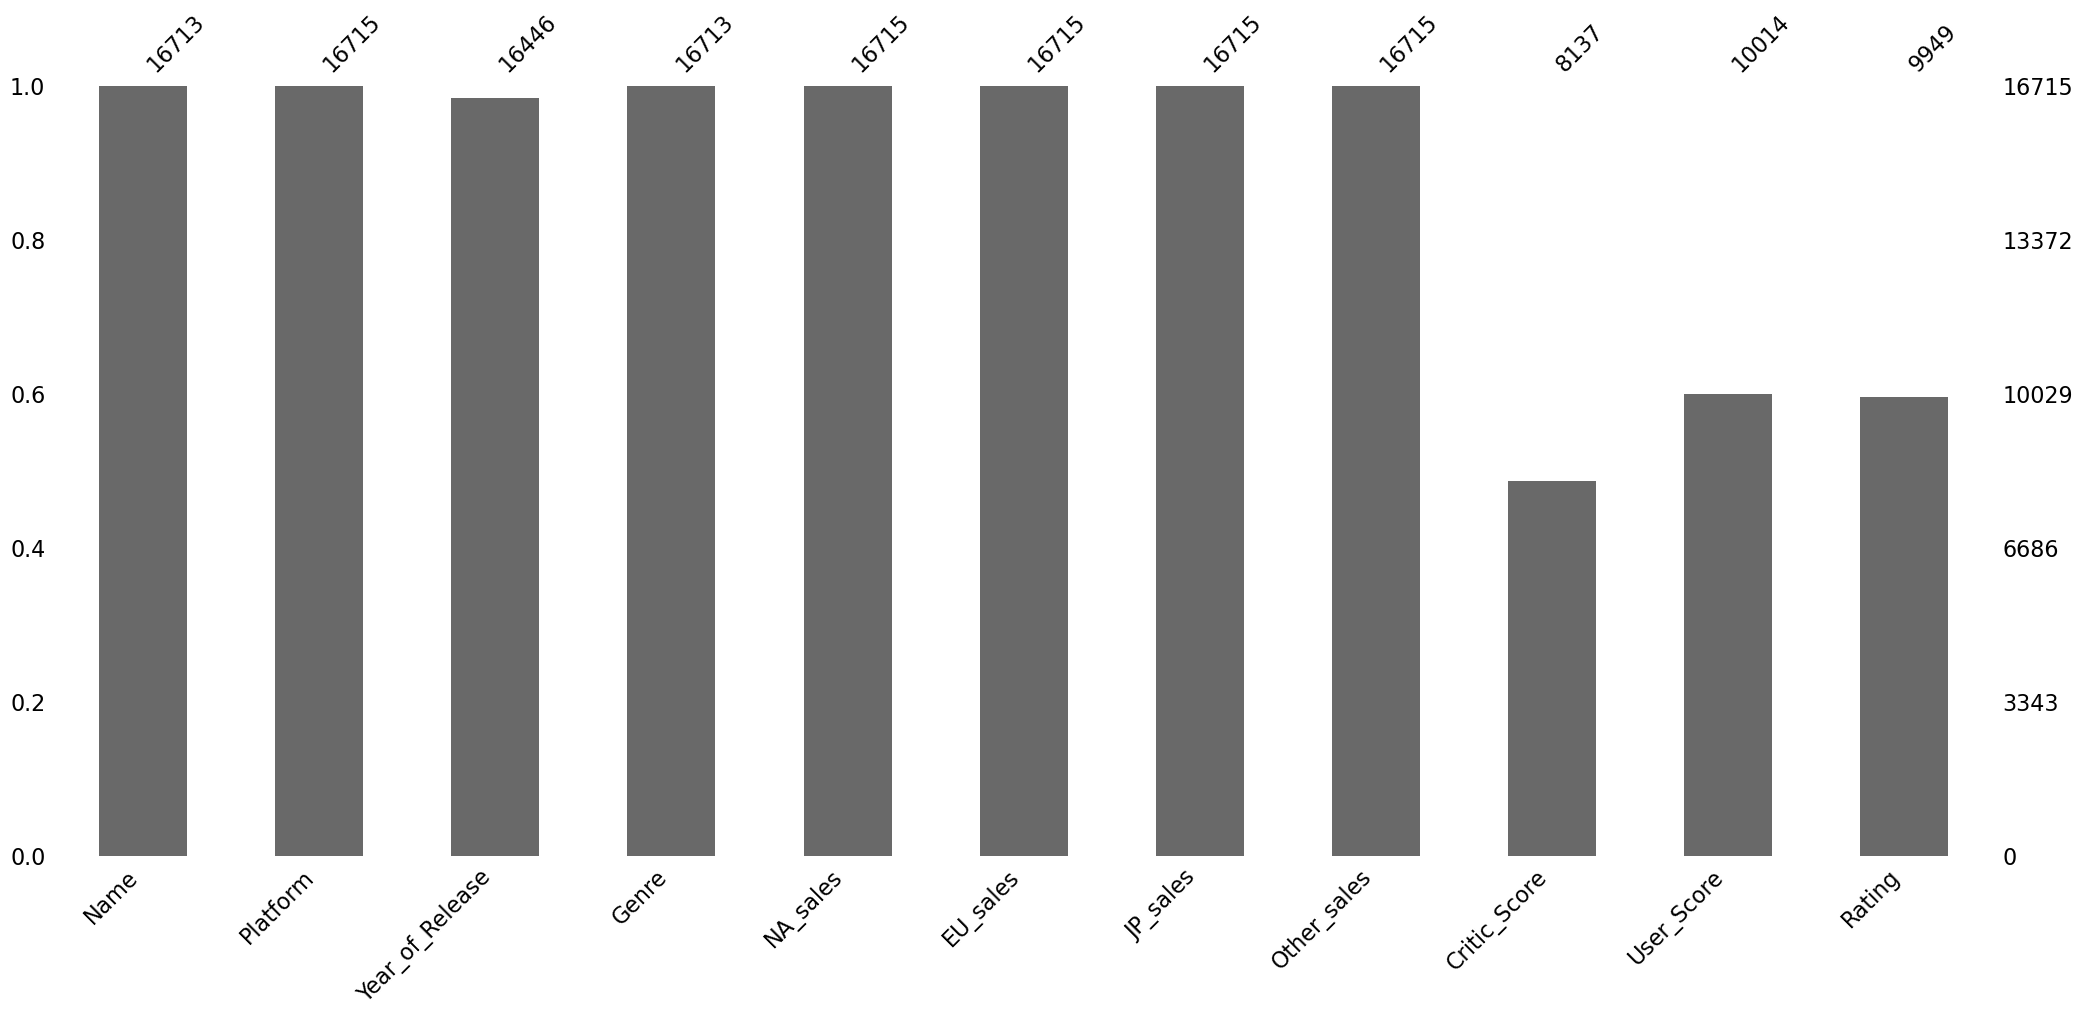

In [87]:
# Investigating missing values
msno.bar(games)

In [88]:
# Checking for duplicates
print('Number of duplicates:', games.duplicated().sum())

Number of duplicates: 0


In [89]:
# Converting column names to lowercase
games.columns = games.columns.str.lower()

# Handling 'year_of_release': filling missing values with 0 and converting to integer type
games['year_of_release'].fillna(0, inplace=True)
games['year_of_release'] = games['year_of_release'].astype(int)

# Dropping missing values in 'name' and 'genre' as they are insignificant in number
games.dropna(subset=['name', 'genre'], inplace=True)

# Calculating total sales across all regions and saving in a new column
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Replacing 'tbd' in 'user_score' with None and converting the column to float type
games['user_score'] = games['user_score'].replace('tbd', None).astype(float)

# Displaying the updated dataset information
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


### Initial Observations  

During the preliminary stage of data preprocessing, the following actions were undertaken:  

- Standardized column labels by converting them to lowercase;  
- Data types were appropriately adjusted:  
    - `user_score` was transitioned to a numeric data type after substituting 'tbd' entries with NaN;  
    - `year_of_release` was cast to an integer data type.  
-  Addressed missing data: 
    - `name` и `genre` — negligible missing entries were omitted, ensuring minimal impact on the dataset's integrity;  
    - `year_of_release` unrecorded years were labeled as 0, treating them as a distinct category;  
    - Retained NaN values in `critic_score`, `user_score`, and `rating` columns, acknowledging the subjective nature of these metrics.
- Aggregated regional sales to compute the `total_sales` for each game;  
- The ambiguous 'tbd' entries in the user_score column, which stood for "To Be Determined", were replaced with NaN, emphasizing that those games had yet to receive finalized user scores. Such placeholders indicate that while the game was available at data collection time, it hadn't garnered enough feedback for a consolidated rating.

## Exploratory Data Analysis (EDA)

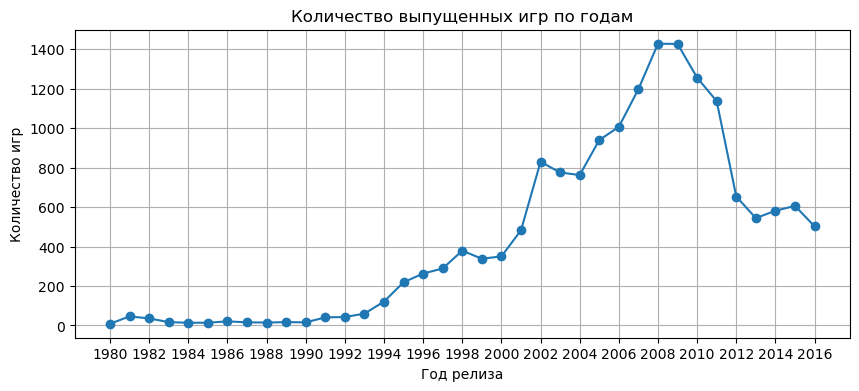

In [90]:
# Определяем количество релизов по годам
games_per_year = games[games['year_of_release'] != 0]['year_of_release'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(games_per_year.index, games_per_year.values, marker='o')
plt.xticks(range(games_per_year.index.min(), games_per_year.index.max()+1, 2))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

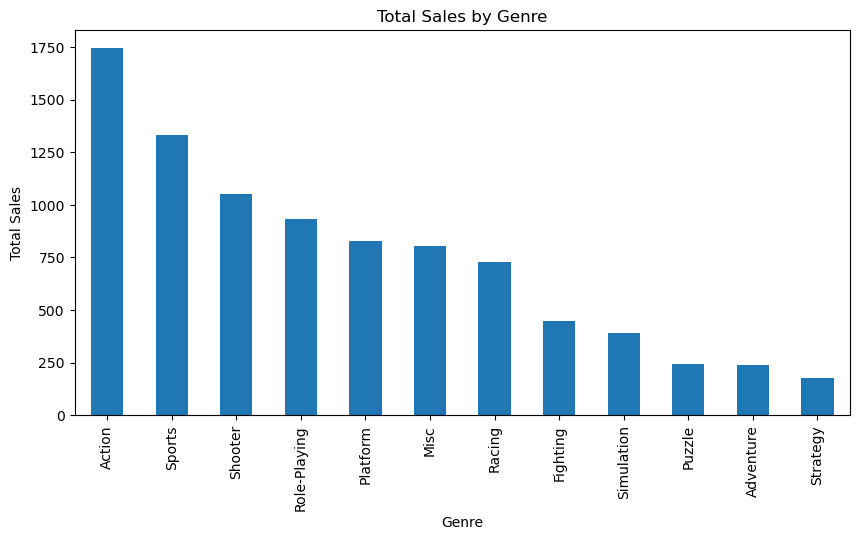

In [91]:
# Общие продажи по жанрам
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre_sales.plot(kind='bar', figsize=(10,5))
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

In [92]:
# Фильтруем данные, чтобы получить игры после 2010
recent_games = games[games['year_of_release'] > 2010]

# Группируем по году и считаем общую сумму
recent_platform_sales = recent_games.groupby(
    ['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

# Выделяем топ-5 по продажам
top_recent_platforms = recent_platform_sales.groupby('platform').agg(
    {'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(5).index.to_list()

# фильтруем данные для топ-5
top_recent_platform_sales = recent_platform_sales[recent_platform_sales['platform'].isin(top_recent_platforms)]

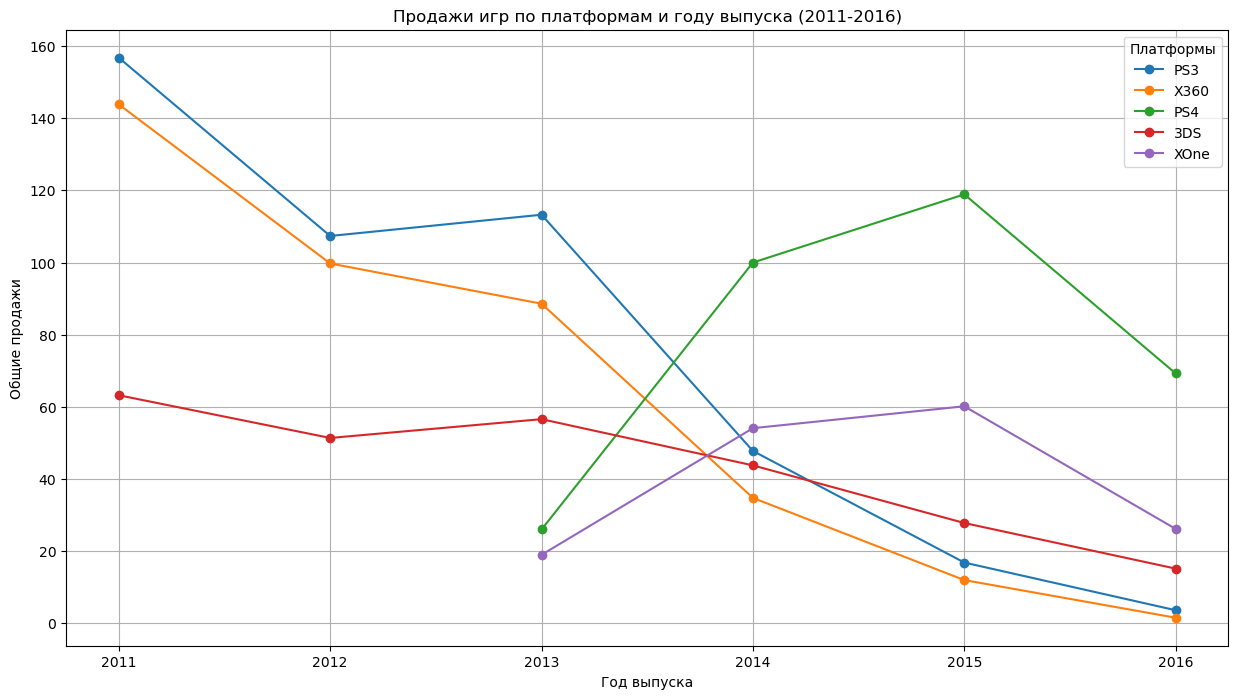

In [93]:
plt.figure(figsize=(15, 8))

for platform in top_recent_platforms:
    platform_data = top_recent_platform_sales[top_recent_platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform, marker='o')

plt.title('Продажи игр по платформам и году выпуска (2011-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи')
plt.xticks(range(2011, 2017))
plt.legend(title='Платформы')
plt.grid(True)

plt.show()

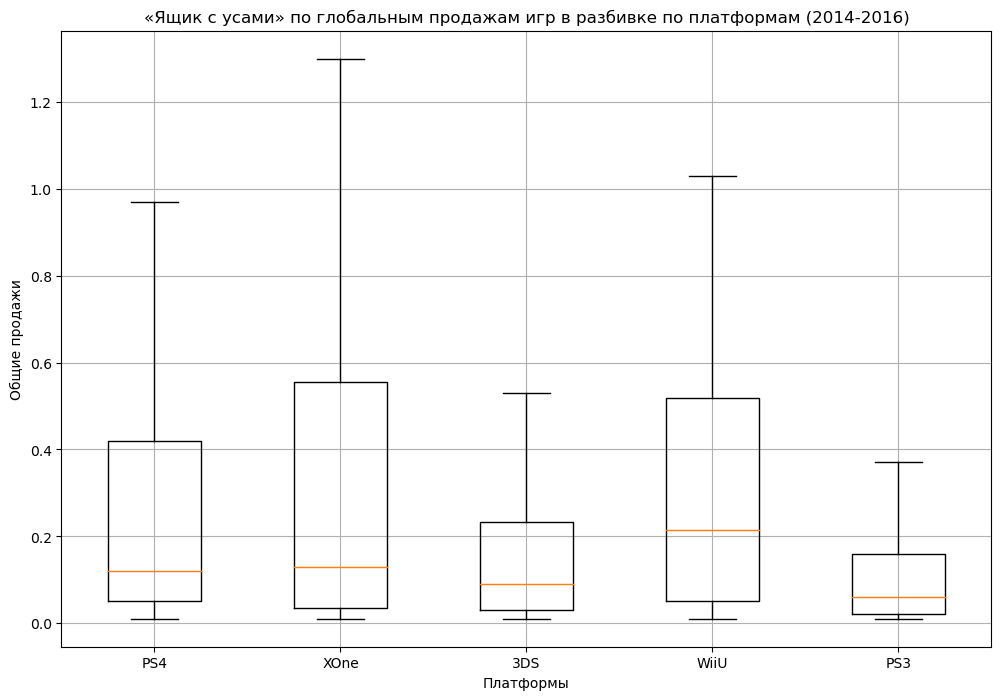

In [94]:
# Фильтруем данные, чтобы получить игры после 2014
recent_games = games[games['year_of_release'] > 2014]

# Группируем по году и считаем общую сумму
recent_platform_sales = recent_games.groupby(
    ['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

# Выделяем топ-5 по продажам
top_recent_platforms = recent_platform_sales.groupby('platform').agg(
    {'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(5).index.to_list()

# фильтруем данные для топ-5
top_recent_platform_sales = recent_platform_sales[recent_platform_sales['platform'].isin(top_recent_platforms)]

# График «ящик с усами» по глобальным продажам игр в разбивке по платформам (2014-2016)
plt.figure(figsize=(12, 8))
plt.boxplot([recent_games[recent_games['platform'] == platform]['total_sales'] for platform in top_recent_platforms], 
            labels=top_recent_platforms, showfliers=False)
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам (2014-2016)')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.grid(True)
plt.show()

In [95]:
# Отбираем данные по одной из популярных платформ
ps = recent_games[recent_games['platform'] == 'PS4']

# Удаляем пропущенные значения в выборке
ps = ps.dropna(subset=['user_score', 'critic_score'])

# Вычесляем корреляцию между user_score/critic_score и total_sales
user_score_corr = ps['user_score'].corr(ps['total_sales'])
critic_score_corr = ps['critic_score'].corr(ps['total_sales'])

user_score_corr, critic_score_corr

(-0.06436843081030288, 0.3920741369660568)

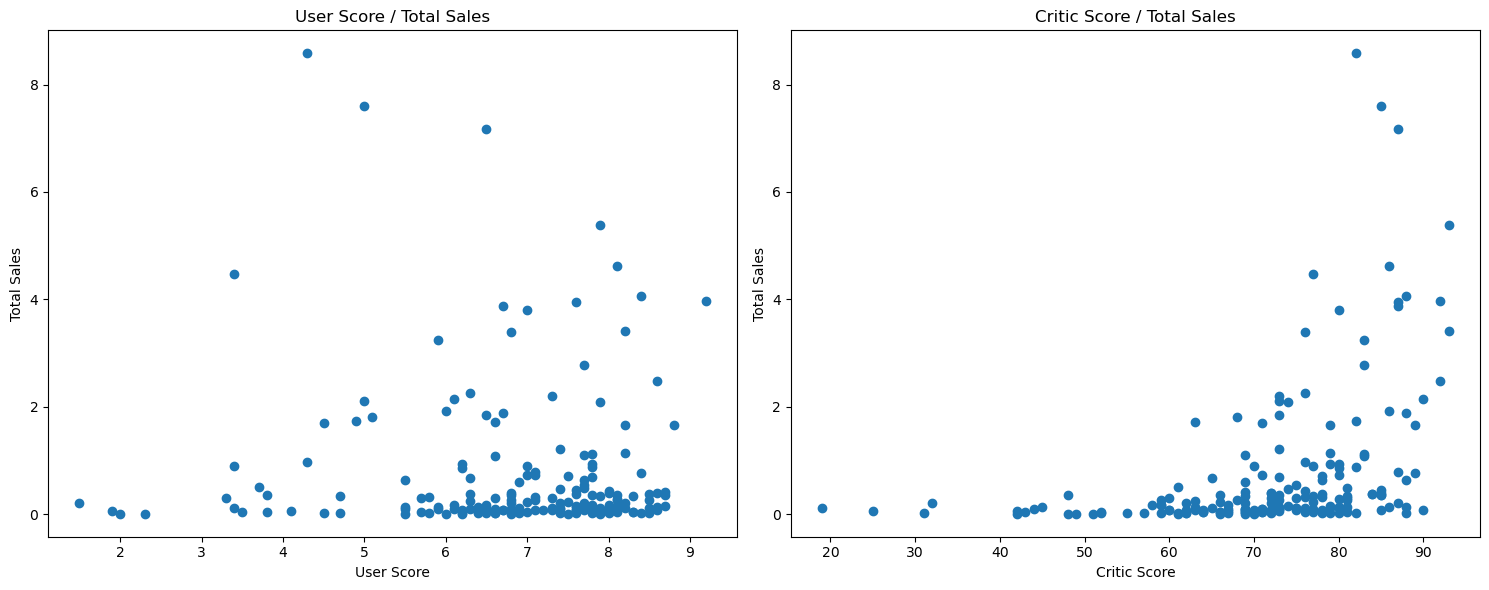

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# User Score / Total Sales
axs[0].scatter(ps['user_score'], ps['total_sales'])
axs[0].set_title('User Score / Total Sales')
axs[0].set_xlabel('User Score')
axs[0].set_ylabel('Total Sales')

# Critic Score / Total Sales
axs[1].scatter(ps['critic_score'], ps['total_sales'])
axs[1].set_title('Critic Score / Total Sales')
axs[1].set_xlabel('Critic Score')
axs[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [97]:
# Рассчитываем корреляции для остальных платформ
for platform in top_recent_platforms:
    platform_data = recent_games[recent_games['platform'] == platform]
    
    user_score_corr = platform_data['total_sales'].corr(platform_data['user_score'])
    print(f'Корреляция продаж и оценки пользователей для {platform}: {user_score_corr:.2f}')
    
    critic_score_corr = platform_data['total_sales'].corr(platform_data['critic_score'])
    print(f'Корреляция продаж и оценки критиков для {platform}: {critic_score_corr:.2f}\n')

Корреляция продаж и оценки пользователей для PS4: -0.06
Корреляция продаж и оценки критиков для PS4: 0.39

Корреляция продаж и оценки пользователей для XOne: -0.04
Корреляция продаж и оценки критиков для XOne: 0.43

Корреляция продаж и оценки пользователей для 3DS: 0.20
Корреляция продаж и оценки критиков для 3DS: 0.18

Корреляция продаж и оценки пользователей для WiiU: 0.36
Корреляция продаж и оценки критиков для WiiU: 0.32

Корреляция продаж и оценки пользователей для PS3: -0.17
Корреляция продаж и оценки критиков для PS3: nan



/Applications/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Applications/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


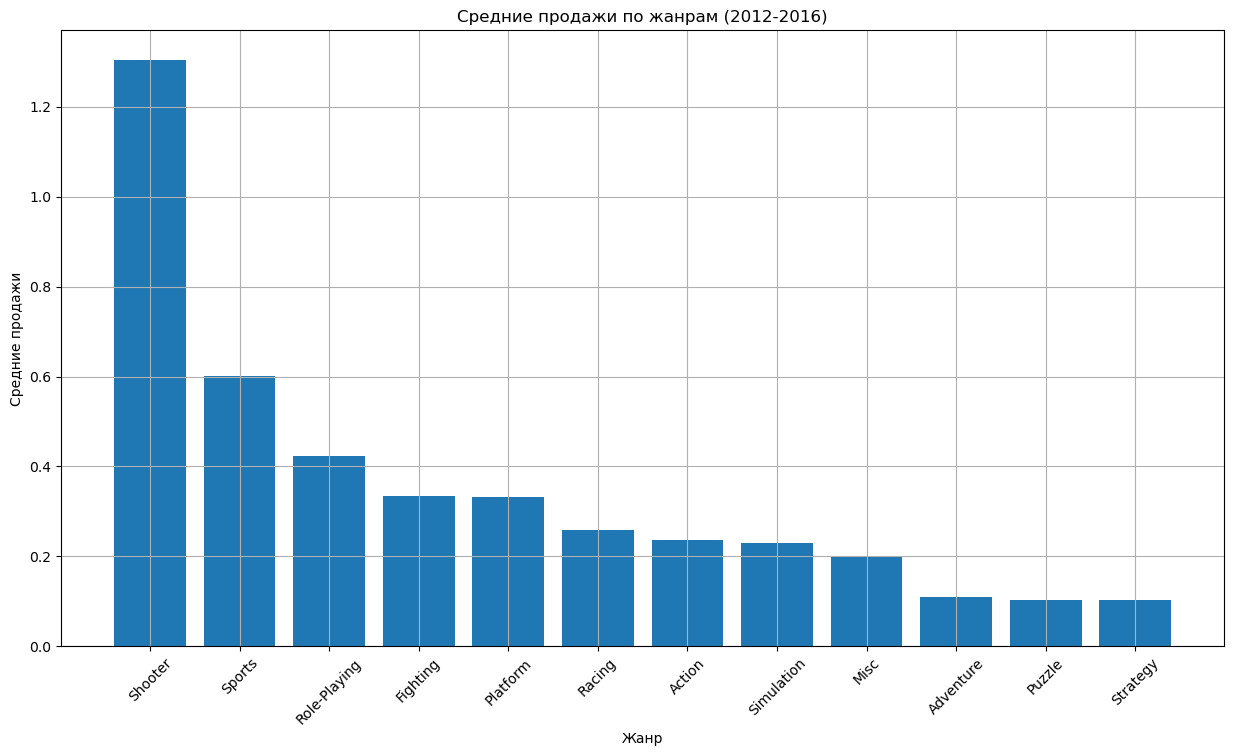

In [98]:
# Средние продажи по жанрам
genre_avg_sales = recent_games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
plt.bar(genre_avg_sales.index, genre_avg_sales)
plt.title('Средние продажи по жанрам (2012-2016)')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Initial Observations:  

    - Release Pattern: Noting that the highest number of games were released between 2008 and 2011 is a useful observation. However, it might be beneficial to discuss or hypothesize why there's a decrease after 2011. This could be due to the rise of mobile gaming, changes in the gaming industry, or other external factors.

    - Platform Lifespan: When you mention the average lifespan of a gaming platform is around 10 years, it would be useful to provide a bit more context. Which platforms were considered? How was this average derived?

    - Correlation of Reviews and Sales: It's indeed crucial to note that while there's a correlation, it's not necessarily causation. For instance, just because a game has high critic scores doesn't mean it will definitely sell well. Many factors can influence game sales, and reviews are just one aspect.

    - Potential Platforms for 2017: Stating that PS4 and XOne are potentially profitable is a good observation. Still, it might be interesting to add a bit more about why this is the case based on the data. Are they newer platforms? Do they have a growing user base?

## User Profile Analysis  

Top 5 platforms for NA region:
          na_sales
platform          
X360        602.47
PS2         583.84
Wii         496.90
PS3         393.49
DS          382.40


Top 5 genres for NA region:
          na_sales
genre             
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27


NA sales by ESRB rating:


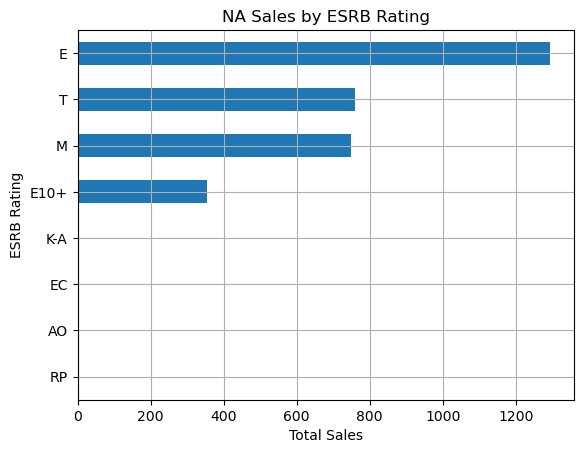

Top 5 platforms for EU region:
          eu_sales
platform          
PS2         339.29
PS3         330.29
X360        270.76
Wii         262.21
PS          213.61


Top 5 genres for EU region:
         eu_sales
genre            
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74


EU sales by ESRB rating:


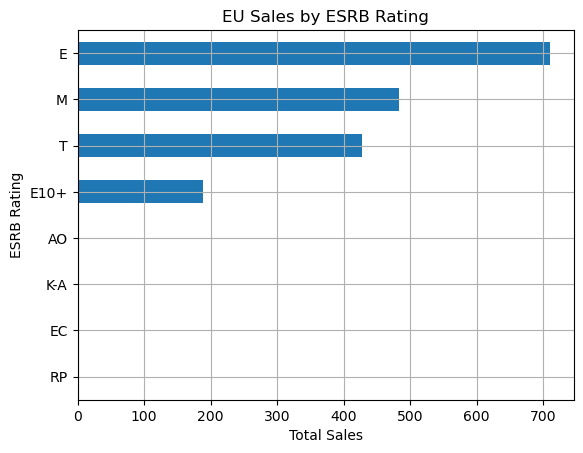

Top 5 platforms for JP region:
          jp_sales
platform          
DS          175.57
PS          139.82
PS2         139.20
SNES        116.55
3DS         100.67


Top 5 genres for JP region:
              jp_sales
genre                 
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11


JP sales by ESRB rating:


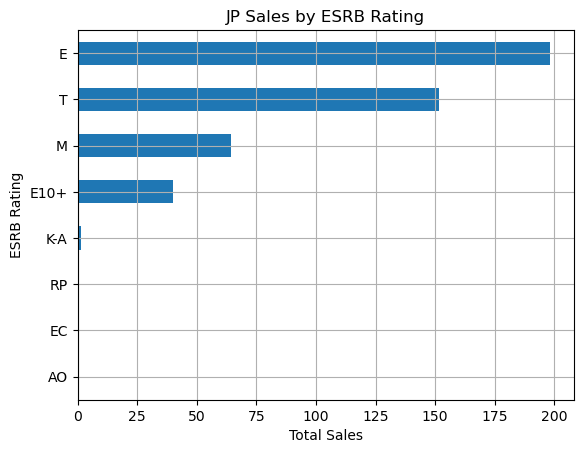

In [99]:
# Group the dataframe by specific columns, 
# sum sales for each unique value of that column 
# and return the top 5 values with the highest sales.
def top_5(df, region, column):
    return df.groupby(column).agg({f'{region}_sales': 'sum'}).sort_values(
        by=f'{region}_sales', ascending=False).head(5)

# Group the dataframe by the ESRB rating column, sum sales 
# for each unique rating value and display the results 
# on a horizontal bar chart.
def plot_sales_by_rating(df, region):
    df.groupby('rating').agg({f'{region}_sales': 'sum'}).sort_values(
        by=f'{region}_sales').plot(kind='barh', legend=False)
    plt.title(f'{region.upper()} Sales by ESRB Rating')
    plt.xlabel('Total Sales')
    plt.ylabel('ESRB Rating')
    plt.grid(True)
    plt.show()
    
# Create a user profile for a specific region using the new functions. 
# Display the top 5 platforms and genres, and a sales chart by ESRB rating.
def create_user_profile(df, region):
    print(f'Top 5 platforms for {region.upper()} region:')
    print(top_5(df, region, 'platform'))
    print('\n')
    
    print(f'Top 5 genres for {region.upper()} region:')
    print(top_5(df, region, 'genre'))
    print('\n')
    
    print(f'{region.upper()} sales by ESRB rating:')
    plot_sales_by_rating(df, region)

# Creating user profiles for each region
for region in ['na', 'eu', 'jp']:
    create_user_profile(games, region)

### Initial Observations  


User profiles for each region:

**North America (NA):**  

    - Most Popular Platforms: X360, PS2, Wii, PS3, DS;
    - Most Popular Genres: Action, Sports, Shooter, Platform, Misc;
    - ESRB Rating Influence: The ESRB rating has a sales influence. Games with an "E" (for Everyone) rating have 
    the highest sales, while games with an "AO" (Adults Only) rating have the lowest sales.

**Europe (EU):**. 

    - Most Popular Platforms: PS2, PS3, X360, Wii, PS;
    - Most Popular Genres: Action, Sports, Shooter, Racing, Misc;
    - ESRB Rating Influence: The ESRB rating also influences sales. Games with an "E" rating lead the sales, 
    followed closely by games with "AO" having the least.  
    
**Japan (JP):**  

    - Most Popular Platforms: DS, PS, PS2, SNES, 3DS;
    - Most Popular Genres: Role-Playing, Action, Sports, Platform, Misc;
    - ESRB Rating Influence: The ESRB rating impacts sales but varies from NA and EU. In Japan, games with an "E" 
    and "T" (Teen) rating have the highest sales.  
    
This data can be useful when planning advertising campaigns in different regions. For instance, Role-Playing games are specifically popular in Japan, while North America and Europe seem to prefer Action games more.

## Hypothesis Testing

#### Hypothesis on the equality of average user scores for the Xbox One and PC platforms  

    Null Hypothesis (H0): The average user scores for the Xbox One and PC platforms are the same;
    Alternative Hypothesis (H1): The average user scores for the Xbox One and PC platforms differ.  
    
To test the hypothesis of the equality of the means of two populations, we'll use the Student's t-test.

In [100]:
# Filter the data by platforms and remove missing values
xone_ratings = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games[games['platform'] == 'PC']['user_score'].dropna()

# Significance level
alpha = 0.05

# t-test
results = stats.ttest_ind(xone_ratings, pc_ratings)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


p-value: 1.3896435533548819e-05
Reject the null hypothesis


#### Hypothesis on the difference in average user scores between the genres Action and Sports  

    Null Hypothesis (H0): The average user scores for the genres Action and Sports are the same;  
    Alternative Hypothesis (H1): The average user scores for the genres Action and Sports differ.  
    
Again, we'll use the Student's t-test to test the hypothesis of the equality of the means of two populations.

In [101]:
# Filter the data by genres and remove missing values
action_ratings = games[games['genre'] == 'Action']['user_score'].dropna()
sports_ratings = games[games['genre'] == 'Sports']['user_score'].dropna()

# Significance level
alpha = 0.05

# t-test
results = stats.ttest_ind(action_ratings, sports_ratings)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


p-value: 0.10406951359049141
Failed to reject the null hypothesis


**Note:**  

In hypothesis testing, it's important to remember that "failing to reject" the null hypothesis doesn't prove it true. Instead, it simply means that there's not enough evidence against it given the data and the test used.

## Final Conclusion

Throughout the research and analysis of the data, the following conclusions can be drawn:

**Trends in the Gaming Industry:**  
    
    The total number of released games has significantly increased from the 1980s until 2008-2011, after which it started to decline. This decrease might be attributed to the shift towards mobile gaming.

**Platform Lifecycle:**  
    
    The majority of gaming platforms peak in popularity within their first 5-6 years.


**Popular Platforms and Genres:**  

    The most popular platforms in the last 10 years (2006-2016) were PS3, X360, Wii, DS, and PS4; 
    The most popular platforms in the last 5 years (2012-2016) were PS4, PS3, X360, 3DS, and XOne;  
    The most profitable genres in the last 5 years (2012-2016) were Shooter, Sports, and Role-Playing.


**User Profiles for Each Region:**  

    - North America and Europe have similar preferences:  
        - The most popular platforms are X360, PS2, Wii, PS3, and DS;  
        - The most popular genres are Shooter, Platform, and Sports.
    - In Japan, there's a preference for different platforms (DS, PS, PS2, SNES, 3DS) and genres 
    (Role-Playing and Action);
    - The ESRB rating influences game sales across all regions.  
  

**Hypothesis Testing:**. 

    - The average user ratings for the Xbox One and PC platforms likely differ;
    - There isn't sufficient evidence to suggest that the average user ratings for the genres Action 
    and Sports differ.  
  

**Based on these conclusions, we can recommend the following:**  

    - Focus on selling games for the PS4 and X360 platforms, as they have been among the most popular in recent years;
    - Concentrate on promoting games in the genres of Shooter, Sports, Role-Playing, and Platform, as these tend 
    to generate the highest profits;
    - When planning advertising campaigns, consider the regional preferences of users. For instance, in Japan, Role-Playing games are particularly popular.


The total number of released games has significantly increased from the 1980s until 2008-2011, after which it started to decline. 
This decrease might be attributed to the shift towards mobile gaming.
